## Observations and Insights 

In [1]:
#this magic code makes plots interactive and updatable.
%matplotlib inLine

In [4]:
# Dependencies and Setup, some of these are custom for increased visibility of the graphs and plots.
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import scipy.stats as sts
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline
%config InlineBackend.figure_formats =['retina']
plt.rc('lines', linewidth=1)
rcParams['figure.figsize'] = 10,8


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [5]:
# Combine the data into a single dataset
mouse_mrgd = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
#A little name change cleanup
mouse_mrgd = mouse_mrgd.rename(columns = {'Weight (g)':'Weight_g'})
mouse_mrgd = mouse_mrgd.rename(columns = {'Tumor Volume (mm3)':'Tumor_Volume_mm3'})
mouse_mrgd = mouse_mrgd.rename(columns = {'Mouse ID':'mouse_id'})



# Display the data table for preview
mouse_mrgd

,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.
#mouse_total = mouse_mrgd['Mouse ID'].nunique()
mouse_total = len(mouse_mrgd['mouse_id'].unique())
mouse_total

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_mrgd.loc[mouse_mrgd.duplicated(subset=['mouse_id', 'Timepoint'], keep=False)]


,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
#mouse_clean = mouse_mrgd[mouse_mrgd['Mouse ID'].map(lambda x: str(x)!="g989")]
mouse_clean = mouse_mrgd.loc[mouse_mrgd.mouse_id != 'g989']
mouse_clean    


,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
#I'm visually validating the removal of the duplicate rows. 909,911,913,915,917 are now removed.
mouse_clean.loc[907:919]

,mouse_id,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
907,g867,Stelasyn,Female,9,25,15,51.060419,1


In [21]:
# Checking the number of mice in the clean DataFrame.
mice_afterDrop = mouse_clean['mouse_id'].nunique()
mice_afterDrop

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [23]:
#perform groupby to get the tumor info on each drug Regimen
summary_stats = mouse_clean.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.rename(columns = {'mean':'Mean Tumor Volume', 
                                'median':'Median Tumor Volume', 
                                'var':'Tumor Volume Variance', 
                                'std':'Tumor Volume Std. Dev.', 
                                'sem':'Tumor Volume Std. Err.'
                               }, inplace=True)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_straight = mouse_clean.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_straight

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#just_drugs = mouse_mrgd.loc[mouse_mrgd.duplicated(['Drug Regimen'], keep='last')]
just_drugs = mouse_mrgd.drop_duplicates(subset=['Drug Regimen'])

In [66]:
drugs = []
for index, row in just_drugs.iterrows():
    drugs.append(row[1])  
drugs

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [72]:
mice_treatment = mouse_clean.groupby("Drug Regimen")["mouse_id"].count().sort_values(ascending=False)
mice_treatment

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: mouse_id, dtype: int64

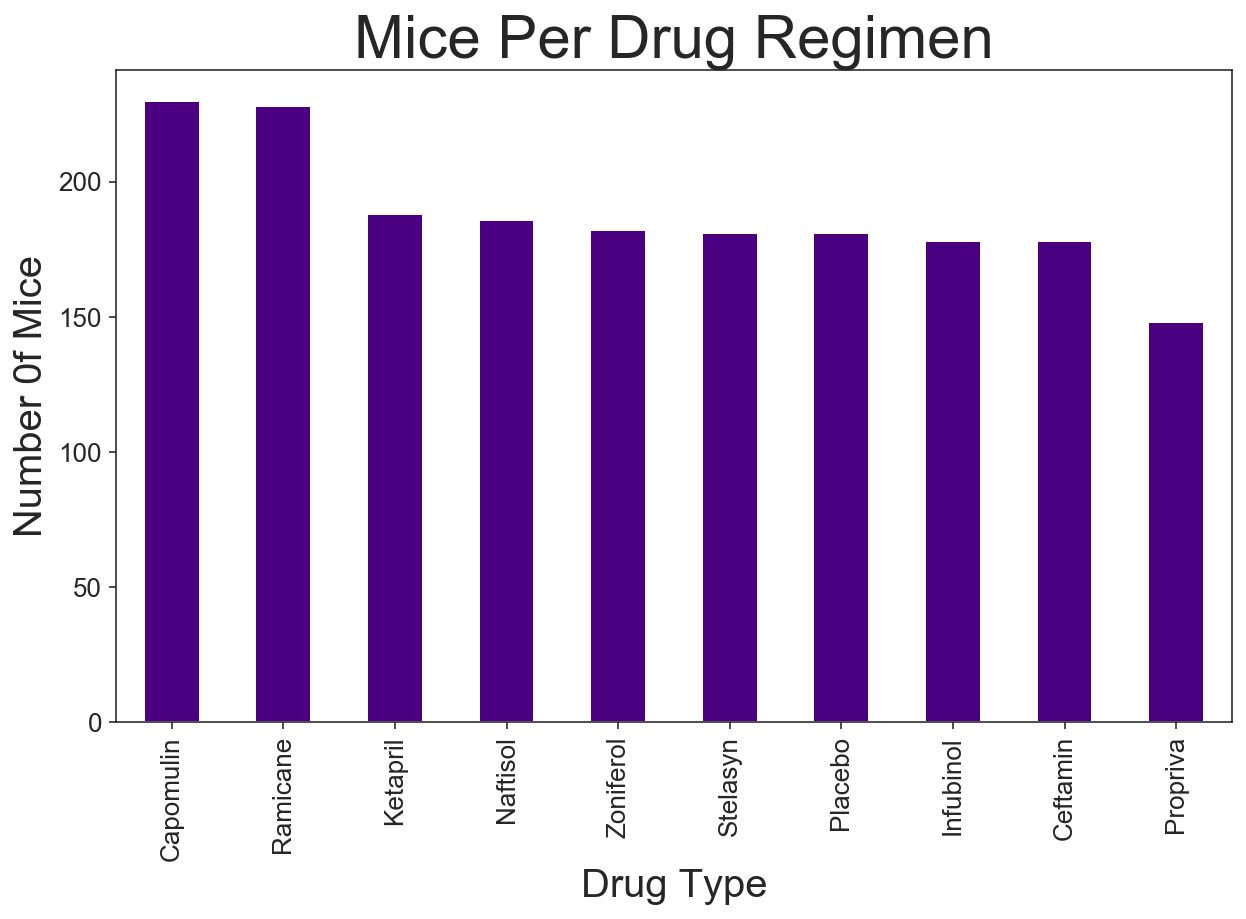

In [79]:
#mice_treatment.plot.bar(color="b", align="center");
ax = mice_treatment.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
ax.set_alpha(0.25)
ax.set_title("Mice Per Drug Regimen", fontsize=30)
ax.set_ylabel("Number 0f Mice", fontsize=20)
ax.set_xlabel("Drug Type", fontsize=20);
plt.show()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
